# DATA 1 Practical 6 - Questions
                                                                                                    Simos Gerasimou


## From Inferences to Predictions and Back. Where Should We Stop?

**Pandas API Reference**: https://pandas.pydata.org/pandas-docs/stable/reference/index.html

**Matplotlib API Reference**: https://matplotlib.org/3.1.1/api/index.html

**Seaborn API Reference**: https://seaborn.pydata.org/api.html

**Scipy Stats API Reference**: https://docs.scipy.org/doc/scipy/reference/stats.html

**t table Reference**:  http://www.ttable.org

**F table Reference**  https://www.stat.purdue.edu/~jtroisi/STAT350Spring2015/tables/FTable.pdf

**Chi-Square table Reference** https://people.smp.uq.edu.au/YoniNazarathy/stat_models_B_course_spring_07/distributions/chisqtab.pdf


In [2]:
#Preamble: Add main Python libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

***

## Inferential Statistics Practical Primer

#### To get started with today's practical, you can go to Lectures 11 and 12 and try to replicate the inferential statistics we saw during the lectures, i.e., independent and paired t test, ANOVA and Chi-Square. This will enable you to understand better how these tests operate under the hood. 

### Part A: Yorkshire City Council

DataVision has been commissioned by the York City Council to analyse a set of data regarding citizens of Yorkshire and extract actionable knowledge. 

The dataset for Yorkhire citizens is available on the following link:
* [Yorkshire dataset](https://drive.google.com/file/d/12UiWQOx8qOiAOBrKirnlU6TG6lv2lfHu/view?usp=sharing)


**TA1) Load the Yorkshire dataset using Pandas**

**Note**: You have to download the dataset on your local machine and then load it onto the Jupyter Notebook

In [3]:
file = "yorkshire.csv"
data = pd.read_csv(file)
data

,id,age,gender,region,income,married,children,car,mortgage
0,ID12101,48,FEMALE,INNER_CITY,17546.000000,NO,1,NO,NO
1,ID12102,40,MALE,TOWN,30085.100000,YES,3,YES,YES
2,ID12103,51,FEMALE,INNER_CITY,16575.400000,YES,0,YES,NO
3,ID12104,23,FEMALE,TOWN,20375.400000,YES,3,NO,NO
4,ID12105,57,FEMALE,RURAL,15944.690366,YES,0,NO,NO
...,...,...,...,...,...,...,...,...,...
325,ID12426,24,FEMALE,TOWN,9465.210000,NO,0,NO,NO
326,ID12427,39,MALE,INNER_CITY,34852.300000,YES,1,NO,YES
327,ID12428,24,MALE,INNER_CITY,21268.400000,YES,0,NO,YES
328,ID12429,57,FEMALE,RURAL,50849.200000,NO,1,NO,YES


**TA2) Print the first 15 records of the dataframe**

In [4]:
data.head(15)

,id,age,gender,region,income,married,children,car,mortgage
0,ID12101,48,FEMALE,INNER_CITY,17546.000000,NO,1,NO,NO
1,ID12102,40,MALE,TOWN,30085.100000,YES,3,YES,YES
2,ID12103,51,FEMALE,INNER_CITY,16575.400000,YES,0,YES,NO
3,ID12104,23,FEMALE,TOWN,20375.400000,YES,3,NO,NO
4,ID12105,57,FEMALE,RURAL,15944.690366,YES,0,NO,NO
5,ID12106,57,FEMALE,TOWN,37869.600000,YES,2,NO,NO
6,ID12107,22,MALE,RURAL,8877.070000,NO,0,NO,NO
7,ID12108,58,MALE,TOWN,24946.600000,YES,0,YES,NO
8,ID12109,37,FEMALE,SUBURBAN,25304.300000,YES,2,YES,NO
9,ID12110,54,MALE,TOWN,24212.100000,YES,2,YES,NO


**TA3) Get general info about the dataset**

In [5]:
data.info

<bound method DataFrame.info of           id  age  gender      region        income married  children  car  \
0    ID12101   48  FEMALE  INNER_CITY  17546.000000      NO         1   NO   
1    ID12102   40    MALE        TOWN  30085.100000     YES         3  YES   
2    ID12103   51  FEMALE  INNER_CITY  16575.400000     YES         0  YES   
3    ID12104   23  FEMALE        TOWN  20375.400000     YES         3   NO   
4    ID12105   57  FEMALE       RURAL  15944.690366     YES         0   NO   
..       ...  ...     ...         ...           ...     ...       ...  ...   
325  ID12426   24  FEMALE        TOWN   9465.210000      NO         0   NO   
326  ID12427   39    MALE  INNER_CITY  34852.300000     YES         1   NO   
327  ID12428   24    MALE  INNER_CITY  21268.400000     YES         0   NO   
328  ID12429   57  FEMALE       RURAL  50849.200000      NO         1   NO   
329  ID12430   27  FEMALE        TOWN  18555.900000     YES         3   NO   

    mortgage  
0         NO  
1

**TA4) Explore the dataset and try to understand the meaning of each variable (column). Identify which variables are categorical and which are numerical.**

In [8]:
data.dtypes

id           object
age           int64
gender       object
region       object
income      float64
married      object
children      int64
car          object
mortgage     object
dtype: object

**TA5) Get the shape of the dataframe**

In [6]:
data.shape

(330, 9)

**TA6) Get the columns name of the dataframe. If you think any column renaming is needed, please do it.**

In [7]:
data.columns

Index(['id', 'age', 'gender', 'region', 'income', 'married', 'children', 'car',
       'mortgage'],
      dtype='object')

**TA7) Check whether there are any duplicated records?**  

Note: A record is duplicated if all its entries are identical with another record

In [10]:
dupes = data.duplicated(None, 'first')

for i in range(len(dupes)):
    if dupes[i] == True:
        print (data.loc[i])

**TA8) Is there any missing data?**

In [14]:
# No
data[['income']]

,income
0,17546.000000
1,30085.100000
2,16575.400000
3,20375.400000
4,15944.690366
...,...
325,9465.210000
326,34852.300000
327,21268.400000
328,50849.200000


**TA9) Plot the histogram and density curve of income.**

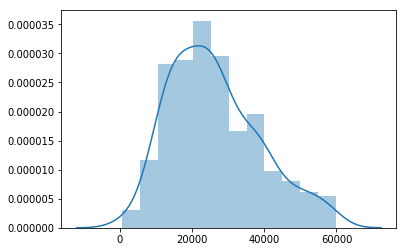

In [25]:
sns.distplot(data[['income']])

**TA10) The Council is interested in assessing whether there is any discrimination in annual income between genders**

**(i) State the Null and Alternative hypotheses**

H_0: pay is independant of geneders

H_1: pay is dependant on gender

**(ii) Calculate the degrees of freedom**

In [26]:
329

389

**(iii) Find the critical value for a two-tailed test with significance level α=0.05**

Hint: t table [http://www.ttable.org](http://www.ttable.org)

Hint: Confirm that the value is correct using the appropriate statistical test method from [scipy.stats.t](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)


In [31]:
#Two tailed: +- 1.9672
from scipy import stats as stats
stats.t

**(iv) Perform the appropriate t test to evaluate the hypotheses for significance level  𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

**TA11) The Council is interested in assessing whether there is any discrimination in annual income between married and single citizens, and specifically whether married citizens are being paid more**

**(i) State the Null and Alternative hypotheses**

In [ ]:
#Write your answer here


**(ii) Calculate the degrees of freedom**

In [ ]:
#Write your answer here


**(iii) Find the critical value for a test with significance level α=0.05**

Hint: t table http://www.ttable.org

Hint: Confirm that the value is correct using the appropriate statistical test method from scipy.stats.t

In [ ]:
#Write your answer here


**(iv) Perform the appropriate t test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [ ]:
#Write your answer here


**(v) Plot the two distributions of income for married and single citizens**

In [ ]:
#Write your answer here


**TA12) The Council is also interested in assessing whether there is any statistically significant difference in income depending on the region citizens live. They want to give equal opportunities to all Yorkies irrespective of where they live.**

**(i) State the Null and Alternative hypotheses that will enable the Council to check whether there is any discrimination in income depending on location**

#### Write your answer here


**(ii) Calculate the degrees of freedom**

In [ ]:
#Write your answer here


**(iii) Find the critical value for a test with significance level α=0.05**

Hint: What type of test do we need to do in this scenario?


In [ ]:
#Write your answer here


**(iv) Perform the appropriate test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [ ]:
#Write your answer here


**(v) Plot a boxplot showing the income per region**

In [ ]:
#Write your answer here


**TA13) The Council is also interested in assessing whether there is any statistically significant difference in income depending on the age of citizens. The Council considers the following age groups [17-29], [30,41], [42,53], [54,67)** 

**(i) State the Null and Alternative hypotheses that will enable the Council to check whether there is any discrimination in income depending on these age groups**

#### Write your answer here


**(ii) Calculate the degrees of freedom**

In [ ]:
#Write your answer here


**(iv) Perform the appropriate test to evaluate the hypotheses for significance level 𝛼=0.05. You may use the appropriate scipy.stats method.**

In [ ]:
#Write your answer here


**(v) Plot the distributions for the four age groups**

In [ ]:
#Write your answer here


**(vi) Perform a post hoc analysis using the Bonferroni correction to identify the pairs which exhibit statistically significant difference**

In [ ]:
#Write your answer here


**(vii) Plot a boxplot showing the income per age group**

In [ ]:
#Write your answer here


**TA14) Implement the Pearson colleration metric to investigate whether there is any correlation between 'Age' (no groups) and 'Income'. Once you finish the implementation you can check their correctness using the built-in functions of Scipy.stats**

What is your interpretation for the correlation between "Age" and "Income"?

* Tip: See https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html


In [ ]:
#Write your answer here


**TA15) Create a new column in the dataframe called "age group" that splits the ages into groups of size 15**

Hint: Look at the Pandas method cut(data, bins, labels)

In [ ]:
#Write your answer here


**TA16) Generate a contingency table to show how the age group (x axis) is related to the region (y axis)**

* Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

**Note**: A contingency table summarises data for two (or more) categorical variables

In [ ]:
#Write your answer here


**TA17) What would be the hypotheses if the Council wants to assess whether the age group and region variables are independent? Report these hypotheses**

In [ ]:
#Write your answer here


**TA18) Implement the Chi Square to investigate whether there is any dependency between correlation between region and age group. Once you finish the implementation you can check their correctness using the built-in functions of Scipy.stats**

* Hint: You may need to use the data from TA16

* Hint: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [ ]:
#Write your answer here


**TA19) Calculate the degrees of freedom for TA16/18**

In [ ]:
#Write your answer here


**TA20) Using a significance level 𝛼=0.05, find the critical value for the hypothesis from TA17 and determine whether the Null hypothesis holds or not**

In [ ]:
#Write your answer here


**TA21) Plot a scatter plot for the ages VS income**

In [ ]:
#Write your answer here


**TA22) Train a linear regression model to determine the "best line of fit" for this data using only the Year as the input variable**

* Hint: You might want to use the following library
  
  from sklearn import linear_model
  
 * Hint: You might want to check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
#Write your answer here


**TA23) Extract and report the coefficients (regression coefficient and intercept) of the trained linear regression model**

 * Hint: You might want to check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
#Write your answer here


**TA24) Using your age, make a prediction about your income in 10 years time (i.e., your age in 2030). Also, report the complete linear regression model**


In [ ]:
#Write your answer here


**TA25) Plot the linear regression model alongside the scatter plot from TA21**

* Hint: invoke the plotting functions (one for the scatter plot, one for the linear regression model) one after the other

* Hint: To generate the linear regression model, you can use (i) high school maths or (ii) the predict() method of the LinearRegression library

In [ ]:
#Write your answer here


## Should you finish earlier/want to practice at home, you could

* Go back to the previous practicals and run some statistical tests
    * Do some statistical analysis on the Titanic (e.g., is there a relationship between the people survived and gender?)
    * Do a linear regression on the Android Store (e.g., what might be the rating that a game of a specific nature might received)